# EDA

In [237]:
import numpy as np
import pandas as pd

dataset_path = "../datasets/titanic/"
train_file = dataset_path + "train.csv"
test_file = dataset_path + "test.csv"

def load_dataset(file):
    data = pd.read_csv(file, index_col='PassengerId')
    return data


In [238]:
data_train = load_dataset(train_file)

print(data_train.info())
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [239]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da74690>,
      dtype=object)

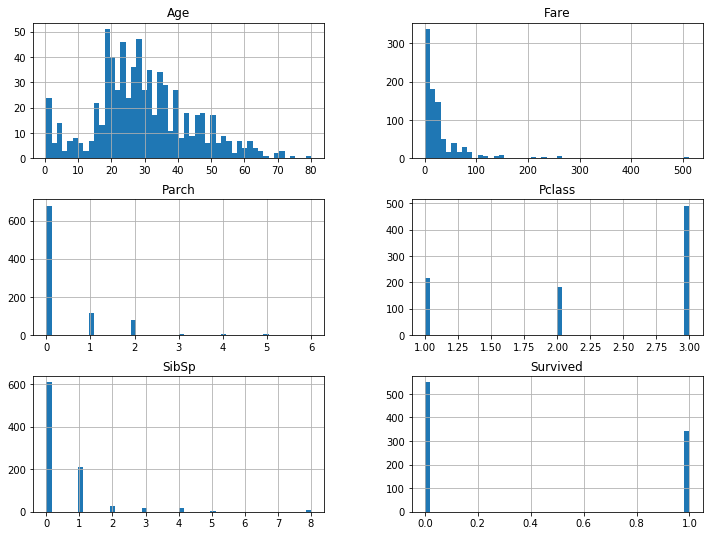

In [240]:
data_train.hist(bins=50, figsize=(12,9))

In [7]:
data_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [71]:
#USELESS
def get_surnames(names):
    return [x.split(',')[0].lower() for x in names]

def ticket_num(tickets):
    num_col = []
    cat_col = []
    for ticket in tickets:
        elems = ticket.split(' ')
        if len(elems)>1:
            num_col.append(elems[1])
            cat_col.append(elems[0])
        else:
            num_col.append(elems[0])
            cat_col.append('0')
    return num_col, cat_col
num_col, cat_col = ticket_num(list(data_train.Ticket))

data_train['surname'] = get_surnames(list(data_train['Name']))
data_train['ticket_pre'] = [x.replace('.','') for x in cat_col]
data_train['ticket_num'] = num_col
data_train['ticket_pre'].value_counts()
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,ticket_pre,ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,braund,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,cumings,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen,STON/O2,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,futrelle,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,allen,0,373450


In [86]:
groups = data_train.groupby('surname')
for group in groups:
    print(group)
    print("=============================")

('abbing',      PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
845          846         0       3  Abbing, Mr. Anthony  male  42.0      0   

     Parch     Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
845      0  C.A. 5547  7.55   NaN        S  abbing         CA       5547  )
('abbott',      PassengerId  Survived  Pclass                              Name     Sex  \
279          280         1       3  Abbott, Mrs. Stanton (Rosa Hunt)  female   
746          747         0       3       Abbott, Mr. Rossmore Edward    male   

      Age  SibSp  Parch     Ticket   Fare Cabin Embarked surname ticket_pre  \
279  35.0      1      1  C.A. 2673  20.25   NaN        S  abbott         CA   
746  16.0      1      1  C.A. 2673  20.25   NaN        S  abbott         CA   

    ticket_num  
279       2673  
746       2673  )
('abelson',      PassengerId  Survived  Pclass                                   Name  \
308          309         0       2                

244       2694  )
('aubart',      PassengerId  Survived  Pclass                           Name     Sex  \
369          370         1       1  Aubart, Mme. Leontine Pauline  female   

      Age  SibSp  Parch    Ticket  Fare Cabin Embarked surname ticket_pre  \
369  24.0      0      0  PC 17477  69.3   B35        C  aubart         PC   

    ticket_num  
369      17477  )
('augustsson',      PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
833          834         0       3  Augustsson, Mr. Albert  male  23.0      0   

     Parch  Ticket    Fare Cabin Embarked     surname ticket_pre ticket_num  
833      0  347468  7.8542   NaN        S  augustsson          0     347468  )
('ayoub',      PassengerId  Survived  Pclass                  Name     Sex   Age  SibSp  \
780          781         1       3  Ayoub, Miss. Banoura  female  13.0      0   

     Parch Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
780      0   2687  7.2292   NaN        C   ay

162     347068  )
('berglund',      PassengerId  Survived  Pclass                          Name   Sex   Age  \
225          226         0       3  Berglund, Mr. Karl Ivar Sven  male  22.0   

     SibSp  Parch   Ticket  Fare Cabin Embarked   surname ticket_pre  \
225      0      0  PP 4348  9.35   NaN        S  berglund         PP   

    ticket_num  
225       4348  )
('berriman',      PassengerId  Survived  Pclass                        Name   Sex   Age  \
733          734         0       2  Berriman, Mr. William John  male  23.0   

     SibSp  Parch Ticket  Fare Cabin Embarked   surname ticket_pre ticket_num  
733      0      0  28425  13.0   NaN        S  berriman          0      28425  )
('betros',      PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
378          379         0       3  Betros, Mr. Tannous  male  20.0      0   

     Parch Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
378      0   2648  4.0125   NaN        C  betros        

143      0  365222  6.75   NaN        Q   burke          0     365222  )
('burns',      PassengerId  Survived  Pclass                             Name     Sex  \
337          338         1       1  Burns, Miss. Elizabeth Margaret  female   

      Age  SibSp  Parch Ticket   Fare Cabin Embarked surname ticket_pre  \
337  41.0      0      0  16966  134.5   E40        C   burns          0   

    ticket_num  
337      16966  )
('buss',      PassengerId  Survived  Pclass              Name     Sex   Age  SibSp  \
387          388         1       2  Buss, Miss. Kate  female  36.0      0   

     Parch Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
387      0  27849  13.0   NaN        S    buss          0      27849  )
('butler',      PassengerId  Survived  Pclass                         Name   Sex   Age  \
666          667         0       2  Butler, Mr. Reginald Fenton  male  25.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
666      0      

854      0  244252   26.0      NaN        S  carter          0     244252  )
('cavendish',      PassengerId  Survived  Pclass                           Name   Sex   Age  \
741          742         0       1  Cavendish, Mr. Tyrell William  male  36.0   

     SibSp  Parch Ticket   Fare Cabin Embarked    surname ticket_pre  \
741      1      0  19877  78.85   C46        S  cavendish          0   

    ticket_num  
741      19877  )
('celotti',     PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
89           90         0       3  Celotti, Mr. Francesco  male  24.0      0   

    Parch  Ticket  Fare Cabin Embarked  surname ticket_pre ticket_num  
89      0  343275  8.05   NaN        S  celotti          0     343275  )
('chaffee',     PassengerId  Survived  Pclass                         Name   Sex   Age  \
92           93         0       1  Chaffee, Mr. Herbert Fuller  male  46.0   

    SibSp  Parch       Ticket    Fare Cabin Embarked  surname ticket_pre  \
92 

('connaghton',      PassengerId  Survived  Pclass                     Name   Sex   Age  \
749          750         0       3  Connaghton, Mr. Michael  male  31.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked     surname ticket_pre  \
749      0      0  335097  7.75   NaN        Q  connaghton          0   

    ticket_num  
749     335097  )
('connolly',      PassengerId  Survived  Pclass                  Name     Sex   Age  SibSp  \
289          290         1       3  Connolly, Miss. Kate  female  22.0      0   

     Parch  Ticket  Fare Cabin Embarked   surname ticket_pre ticket_num  
289      0  370373  7.75   NaN        Q  connolly          0     370373  )
('connors',      PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
116          117         0       3  Connors, Mr. Patrick  male  70.5      0   

     Parch  Ticket  Fare Cabin Embarked  surname ticket_pre ticket_num  
116      0  370369  7.75   NaN        Q  connors          0     370369  )
('cook', 

559  345572  17.4   NaN        S  de messemaeker          0     345572  )
('de mulder',      PassengerId  Survived  Pclass                     Name   Sex   Age  \
286          287         1       3  de Mulder, Mr. Theodore  male  30.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked    surname ticket_pre  \
286      0      0  345774   9.5   NaN        S  de mulder          0   

    ticket_num  
286     345774  )
('de pelsmaeker',      PassengerId  Survived  Pclass                       Name   Sex   Age  \
282          283         0       3  de Pelsmaeker, Mr. Alfons  male  16.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked        surname ticket_pre  \
282      0      0  345778   9.5   NaN        S  de pelsmaeker          0   

    ticket_num  
282     345778  )
('dean',      PassengerId  Survived  Pclass                        Name   Sex   Age  \
93            94         0       3     Dean, Mr. Bertram Frank  male  26.0   
788          789         1       3  Dean, Master. Bertr

129      0  347061  6.975   NaN        S  ekstrom          0     347061  )
('elias',      PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
352          353         0       3    Elias, Mr. Tannous  male  15.0      1   
532          533         0       3  Elias, Mr. Joseph Jr  male  17.0      1   
773          774         0       3       Elias, Mr. Dibo  male   NaN      0   

     Parch Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
352      1   2695  7.2292   NaN        C   elias          0       2695  
532      1   2690  7.2292   NaN        C   elias          0       2690  
773      0   2674  7.2250   NaN        C   elias          0       2674  )
('elsbury',      PassengerId  Survived  Pclass                        Name   Sex   Age  \
592          593         0       3  Elsbury, Mr. William James  male  47.0   

     SibSp  Parch    Ticket  Fare Cabin Embarked  surname ticket_pre  \
592      0      0  A/5 3902  7.25   NaN        S  elsbury       

137  113803  53.1  C123        S  futrelle          0     113803  )
('fynney',     PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
20           21         0       2  Fynney, Mr. Joseph J  male  35.0      0   

    Parch  Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
20      0  239865  26.0   NaN        S  fynney          0     239865  )
('gale',      PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
405          406         0       2  Gale, Mr. Shadrach  male  34.0      1   

     Parch Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
405      0  28664  21.0   NaN        S    gale          0      28664  )
('gallagher',      PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
703          704         0       3  Gallagher, Mr. Martin  male  25.0      0   

     Parch Ticket    Fare Cabin Embarked    surname ticket_pre ticket_num  
703      0  36864  7.7417   NaN        Q  gallagher          0 

97         PC      17759  )
('gronnestad',      PassengerId  Survived  Pclass                              Name   Sex  \
769          770         0       3  Gronnestad, Mr. Daniel Danielsen  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked     surname ticket_pre  \
769  32.0      0      0   8471  8.3625   NaN        S  gronnestad          0   

    ticket_num  
769       8471  )
('guggenheim',      PassengerId  Survived  Pclass                      Name   Sex   Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male  46.0   

     SibSp  Parch    Ticket  Fare    Cabin Embarked     surname ticket_pre  \
789      0      0  PC 17593  79.2  B82 B84        C  guggenheim         PC   

    ticket_num  
789      17593  )
('gustafsson',      PassengerId  Survived  Pclass                            Name   Sex  \
104          105         0       3  Gustafsson, Mr. Anders Vilhelm  male   
379          380         0       3     Gustafsson, Mr. Karl Gideon  male   
3

654     365226  )
('heikkinen',    PassengerId  Survived  Pclass                    Name     Sex   Age  SibSp  \
2            3         1       3  Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket   Fare Cabin Embarked    surname ticket_pre  \
2      0  STON/O2. 3101282  7.925   NaN        S  heikkinen    STON/O2   

  ticket_num  
2    3101282  )
('heininen',      PassengerId  Survived  Pclass                          Name     Sex  \
816          817         0       3  Heininen, Miss. Wendla Maria  female   

      Age  SibSp  Parch            Ticket   Fare Cabin Embarked   surname  \
816  23.0      0      0  STON/O2. 3101290  7.925   NaN        S  heininen   

    ticket_pre ticket_num  
816    STON/O2    3101290  )
('hendekovic',      PassengerId  Survived  Pclass                    Name   Sex   Age  SibSp  \
313          314         0       3  Hendekovic, Mr. Ignjac  male  28.0      0   

     Parch  Ticket    Fare Cabin Embarked     surname ticket_pre tick

61      0  113572  80.0   B28      NaN   icard          0     113572  )
('ilett',     PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
84           85         1       2  Ilett, Miss. Bertha  female  17.0      0   

    Parch      Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
84      0  SO/C 14885  10.5   NaN        S   ilett       SO/C      14885  )
('ilmakangas',      PassengerId  Survived  Pclass                           Name     Sex  \
729          730         0       3  Ilmakangas, Miss. Pieta Sofia  female   

      Age  SibSp  Parch            Ticket   Fare Cabin Embarked     surname  \
729  25.0      1      0  STON/O2. 3101271  7.925   NaN        S  ilmakangas   

    ticket_pre ticket_num  
729    STON/O2    3101271  )
('isham',      PassengerId  Survived  Pclass                        Name     Sex   Age  \
177          178         0       1  Isham, Miss. Ann Elizabeth  female  50.0   

     SibSp  Parch    Ticket     Fare Cabin Embarked

478     350060  )
('karun',      PassengerId  Survived  Pclass                Name     Sex  Age  SibSp  \
691          692         1       3  Karun, Miss. Manca  female  4.0      0   

     Parch  Ticket     Fare Cabin Embarked surname ticket_pre ticket_num  
691      1  349256  13.4167   NaN        C   karun          0     349256  )
('kassem',      PassengerId  Survived  Pclass               Name   Sex  Age  SibSp  \
524          525         0       3  Kassem, Mr. Fared  male  NaN      0   

     Parch Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
524      0   2700  7.2292   NaN        C  kassem          0       2700  )
('keane',      PassengerId  Survived  Pclass                      Name     Sex  Age  \
303          304         1       2       Keane, Miss. Nora A  female  NaN   
790          791         0       3  Keane, Mr. Andrew "Andy"    male  NaN   

     SibSp  Parch  Ticket   Fare Cabin Embarked surname ticket_pre ticket_num  
303      0      0  226593  12.35 

796      0      0  17465  25.9292   D17        S  leader          0      17465  )
('leeni',      PassengerId  Survived  Pclass                               Name   Sex  \
553          554         1       3  Leeni, Mr. Fahim ("Philip Zenni")  male   

      Age  SibSp  Parch Ticket   Fare Cabin Embarked surname ticket_pre  \
553  22.0      0      0   2620  7.225   NaN        C   leeni          0   

    ticket_num  
553       2620  )
('lefebre',      PassengerId  Survived  Pclass                           Name     Sex  \
176          177         0       3  Lefebre, Master. Henry Forbes    male   
229          230         0       3        Lefebre, Miss. Mathilde  female   
409          410         0       3             Lefebre, Miss. Ida  female   
485          486         0       3         Lefebre, Miss. Jeannie  female   

     Age  SibSp  Parch Ticket     Fare Cabin Embarked  surname ticket_pre  \
176  NaN      3      1   4133  25.4667   NaN        S  lefebre          0   
229  NaN   

631     347743  )
('lurette',      PassengerId  Survived  Pclass                  Name     Sex   Age  SibSp  \
195          196         1       1  Lurette, Miss. Elise  female  58.0      0   

     Parch    Ticket      Fare Cabin Embarked  surname ticket_pre ticket_num  
195      0  PC 17569  146.5208   B80        C  lurette         PC      17569  )
('mack',      PassengerId  Survived  Pclass               Name     Sex   Age  SibSp  \
772          773         0       2  Mack, Mrs. (Mary)  female  57.0      0   

     Parch       Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
772      0  S.O./P.P. 3  10.5   E77        S    mack      SO/PP          3  )
('madigan',      PassengerId  Survived  Pclass                              Name     Sex  \
198          199         1       3  Madigan, Miss. Margaret "Maggie"  female   

     Age  SibSp  Parch  Ticket  Fare Cabin Embarked  surname ticket_pre  \
198  NaN      0      0  370370  7.75   NaN        Q  madigan          0   

   

397      0      0  28403  26.0   NaN        S  mckane          0      28403  )
('mcmahon',      PassengerId  Survived  Pclass                 Name   Sex  Age  SibSp  \
126          127         0       3  McMahon, Mr. Martin  male  NaN      0   

     Parch  Ticket  Fare Cabin Embarked  surname ticket_pre ticket_num  
126      0  370372  7.75   NaN        Q  mcmahon          0     370372  )
('mcnamee',      PassengerId  Survived  Pclass               Name   Sex   Age  SibSp  \
743          744         0       3  McNamee, Mr. Neal  male  24.0      1   

     Parch  Ticket  Fare Cabin Embarked  surname ticket_pre ticket_num  
743      0  376566  16.1   NaN        S  mcnamee          0     376566  )
('meanwell',      PassengerId  Survived  Pclass                            Name     Sex  \
564          565         0       3  Meanwell, Miss. (Marion Ogden)  female   

     Age  SibSp  Parch             Ticket  Fare Cabin Embarked   surname  \
564  NaN      0      0  SOTON/O.Q. 392087  8.05  

709      1   2661  15.2458   NaN        C  moubarek          0       2661  )
('moussa',      PassengerId  Survived  Pclass                            Name     Sex  \
367          368         1       3  Moussa, Mrs. (Mantoura Boulos)  female   

     Age  SibSp  Parch Ticket    Fare Cabin Embarked surname ticket_pre  \
367  NaN      0      0   2626  7.2292   NaN        C  moussa          0   

    ticket_num  
367       2626  )
('moutal',     PassengerId  Survived  Pclass                      Name   Sex  Age  SibSp  \
77           78         0       3  Moutal, Mr. Rahamin Haim  male  NaN      0   

    Parch  Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
77      0  374746  8.05   NaN        S  moutal          0     374746  )
('mudd',      PassengerId  Survived  Pclass                      Name   Sex   Age  \
841          842         0       2  Mudd, Mr. Thomas Charles  male  16.0   

     SibSp  Parch       Ticket  Fare Cabin Embarked surname ticket_pre  \
841      0      

141      0      0  347081  7.75   NaN        S  nysten          0     347081  )
('nysveen',      PassengerId  Survived  Pclass                       Name   Sex   Age  \
326          327         0       3  Nysveen, Mr. Johan Hansen  male  61.0   

     SibSp  Parch  Ticket    Fare Cabin Embarked  surname ticket_pre  \
326      0      0  345364  6.2375   NaN        S  nysveen          0   

    ticket_num  
326     345364  )
("o'brien",      PassengerId  Survived  Pclass  \
186          187         1       3   
364          365         0       3   
552          553         0       3   

                                                Name     Sex  Age  SibSp  \
186  O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)  female  NaN      1   
364                              O'Brien, Mr. Thomas    male  NaN      1   
552                             O'Brien, Mr. Timothy    male  NaN      0   

     Parch  Ticket     Fare Cabin Embarked  surname ticket_pre ticket_num  
186      0  370365  15.5000

('pasic',      PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  \
836          837         0       3  Pasic, Mr. Jakob  male  21.0      0   

     Parch  Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
836      0  315097  8.6625   NaN        S   pasic          0     315097  )
('patchett',      PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
575          576         0       3  Patchett, Mr. George  male  19.0      0   

     Parch  Ticket  Fare Cabin Embarked   surname ticket_pre ticket_num  
575      0  358585  14.5   NaN        S  patchett          0     358585  )
('paulner',      PassengerId  Survived  Pclass                 Name   Sex  Age  SibSp  \
584          585         0       3  Paulner, Mr. Uscher  male  NaN      0   

     Parch Ticket    Fare Cabin Embarked  surname ticket_pre ticket_num  
584      0   3411  8.7125   NaN        C  paulner          0       3411  )
('pavlovic',      PassengerId  Survived  Pclass      

879      1  11767  83.1583   C50        C  potter          0      11767  )
('quick',      PassengerId  Survived  Pclass  \
506          507         1       2   
530          531         1       2   

                                              Name     Sex   Age  SibSp  \
506  Quick, Mrs. Frederick Charles (Jane Richards)  female  33.0      0   
530                       Quick, Miss. Phyllis May  female   2.0      1   

     Parch Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
506      2  26360  26.0   NaN        S   quick          0      26360  
530      1  26360  26.0   NaN        S   quick          0      26360  )
('radeff',      PassengerId  Survived  Pclass                   Name   Sex  Age  SibSp  \
656          657         0       3  Radeff, Mr. Alexander  male  NaN      0   

     Parch  Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
656      0  349223  7.8958   NaN        S  radeff          0     349223  )
('razi',      PassengerId  Survived  Pcla

759      0  110152  86.5   B77        S  rothes          0     110152  )
('rothschild',      PassengerId  Survived  Pclass  \
513          514         1       1   

                                               Name     Sex   Age  SibSp  \
513  Rothschild, Mrs. Martin (Elizabeth L. Barrett)  female  54.0      1   

     Parch    Ticket  Fare Cabin Embarked     surname ticket_pre ticket_num  
513      0  PC 17603  59.4   NaN        C  rothschild         PC      17603  )
('rouse',      PassengerId  Survived  Pclass                      Name   Sex   Age  \
482          483         0       3  Rouse, Mr. Richard Henry  male  50.0   

     SibSp  Parch    Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
482      0      0  A/5 3594  8.05   NaN        S   rouse        A/5       3594  )
('rugg',     PassengerId  Survived  Pclass               Name     Sex   Age  SibSp  \
56           57         1       2  Rugg, Miss. Emily  female  21.0      0   

    Parch      Ticket  Fare Cabin E

880  230433  26.0   NaN        S  shelley          0     230433  )
('shorney',     PassengerId  Survived  Pclass                         Name   Sex  Age  \
95           96         0       3  Shorney, Mr. Charles Joseph  male  NaN   

    SibSp  Parch  Ticket  Fare Cabin Embarked  surname ticket_pre ticket_num  
95      0      0  374910  8.05   NaN        S  shorney          0     374910  )
('shutes',      PassengerId  Survived  Pclass                       Name     Sex   Age  \
609          610         1       1  Shutes, Miss. Elizabeth W  female  40.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked surname ticket_pre  \
609      0      0  PC 17582  153.4625  C125        S  shutes         PC   

    ticket_num  
609      17582  )
('silven',      PassengerId  Survived  Pclass                           Name     Sex  \
417          418         1       2  Silven, Miss. Lyyli Karoliina  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked surname ticket_pre  \
417  18.0 

632      13214  )
('staneff',     PassengerId  Survived  Pclass               Name   Sex  Age  SibSp  Parch  \
76           77         0       3  Staneff, Mr. Ivan  male  NaN      0      0   

    Ticket    Fare Cabin Embarked  surname ticket_pre ticket_num  
76  349208  7.8958   NaN        S  staneff          0     349208  )
('stankovic',      PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
285          286         0       3  Stankovic, Mr. Ivan  male  33.0      0   

     Parch  Ticket    Fare Cabin Embarked    surname ticket_pre ticket_num  
285      0  349239  8.6625   NaN        C  stankovic          0     349239  )
('stanley',      PassengerId  Survived  Pclass                             Name     Sex  \
494          495         0       3       Stanley, Mr. Edward Roland    male   
649          650         1       3  Stanley, Miss. Amy Zillah Elsie  female   

      Age  SibSp  Parch     Ticket  Fare Cabin Embarked  surname ticket_pre  \
494  21.0      0 

458      0  F.C.C. 13531  10.5   NaN        S  toomey        FCC      13531  )
('torber',      PassengerId  Survived  Pclass                       Name   Sex   Age  \
603          604         0       3  Torber, Mr. Ernst William  male  44.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
603      0      0  364511  8.05   NaN        S  torber          0     364511  )
('tornquist',      PassengerId  Survived  Pclass                          Name   Sex   Age  \
271          272         1       3  Tornquist, Mr. William Henry  male  25.0   

     SibSp  Parch Ticket  Fare Cabin Embarked    surname ticket_pre ticket_num  
271      0      0   LINE   0.0   NaN        S  tornquist          0       LINE  )
('toufik',      PassengerId  Survived  Pclass               Name   Sex  Age  SibSp  \
531          532         0       3  Toufik, Mr. Nakli  male  NaN      0   

     Parch Ticket    Fare Cabin Embarked surname ticket_pre ticket_num  
531      0   2641  7.22

366      0  110813  75.25   D37        C  warren          0     110813  )
('watson',      PassengerId  Survived  Pclass                        Name   Sex  Age  \
674          675         0       2  Watson, Mr. Ennis Hastings  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked surname ticket_pre ticket_num  
674      0      0  239856   0.0   NaN        S  watson          0     239856  )
('watt',      PassengerId  Survived  Pclass  \
161          162         1       2   

                                                  Name     Sex   Age  SibSp  \
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  female  40.0      0   

     Parch      Ticket   Fare Cabin Embarked surname ticket_pre ticket_num  
161      0  C.A. 33595  15.75   NaN        S    watt         CA      33595  )
('webber',      PassengerId  Survived  Pclass                 Name     Sex   Age  SibSp  \
123          124         1       2  Webber, Miss. Susan  female  32.5      0   
511          512         0    

830          0       2659  )
('young',      PassengerId  Survived  Pclass                      Name     Sex   Age  \
325          326         1       1  Young, Miss. Marie Grice  female  36.0   

     SibSp  Parch    Ticket      Fare Cabin Embarked surname ticket_pre  \
325      0      0  PC 17760  135.6333   C32        C   young         PC   

    ticket_num  
325      17760  )
('youseff',      PassengerId  Survived  Pclass                  Name   Sex   Age  SibSp  \
203          204         0       3  Youseff, Mr. Gerious  male  45.5      0   

     Parch Ticket   Fare Cabin Embarked  surname ticket_pre ticket_num  
203      0   2628  7.225   NaN        C  youseff          0       2628  )
('yousif',      PassengerId  Survived  Pclass               Name   Sex  Age  SibSp  \
354          355         0       3  Yousif, Mr. Wazli  male  NaN      0   

     Parch Ticket   Fare Cabin Embarked surname ticket_pre ticket_num  
354      0   2647  7.225   NaN        C  yousif          0       2

# Pipeline

In [273]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion


data_train = load_dataset(train_file)
y = data_train['Survived']
X = data_train.drop('Survived', axis=1)

# Custom Transformers
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.cols].values
    
class FareImputer(BaseEstimator, TransformerMixin):
    def __init__(self, pclass_col, lookup):
        self.lookup = lookup
        self.pclass_col = pclass_col
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        for idx in range(X.shape[0]):
            if X[idx,fare_ix]==0.0:
                X[idx,fare_ix] = self.lookup[self.pclass_col[idx]]
        return X
    
class LogScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X[:,fare_ix] = np.log1p(X[:,fare_ix])
        return X
    

#pipelines defination
# drop_cols = ['Name', 'Cabin', 'Ticket']
cat_cols = ['Sex', 'Embarked']
cat_int_cols = ['Pclass','SibSp','Parch']
num_cols = ['Age','Fare']
pclass_ix, fare_ix = 0, 1
fare_class_dict = dict(X.groupby('Pclass')['Fare'].median())


num_pip = Pipeline([('columnSelect', ColumnSelector(num_cols)),
                    ('impute',SimpleImputer()),
                    ('fareImpute', FareImputer(X['Pclass'], fare_class_dict)),
                    ('logScale', LogScaler()),
                    ('scale', StandardScaler()),
                   ])


cat_pip = Pipeline([('columnSelect',ColumnSelector(cat_cols)),
                    ('impute', SimpleImputer(strategy='most_frequent')),
                    ('encode', OneHotEncoder()),
                   ])

cat_int_pip = Pipeline([('columnSelect',ColumnSelector(cat_int_cols)),
                       ('impute', SimpleImputer(strategy='most_frequent')),
                       ])

full_pip = FeatureUnion(transformer_list=[('num_pip',num_pip),
                                          ('cat_int_pip',cat_int_pip),
                                         ('cat_pip',cat_pip),
                                         ])

X_prepared = full_pip.fit_transform(X)

In [274]:
cols = num_cols+cat_int_cols+['female', 'male', 'C','Q','S']
X_full = pd.DataFrame(X_prepared.toarray(), columns=cols)

In [275]:
X_full

,Age,Fare,Pclass,SibSp,Parch,female,male,C,Q,S
0,-0.592481,-1.006026,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.638789,1.421494,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.284663,-0.918065,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.407926,1.097406,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.407926,-0.902509,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.414526,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-0.823344,0.474585,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.000000,0.209107,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
889,-0.284663,0.474585,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1245f2450>,
      dtype=object)

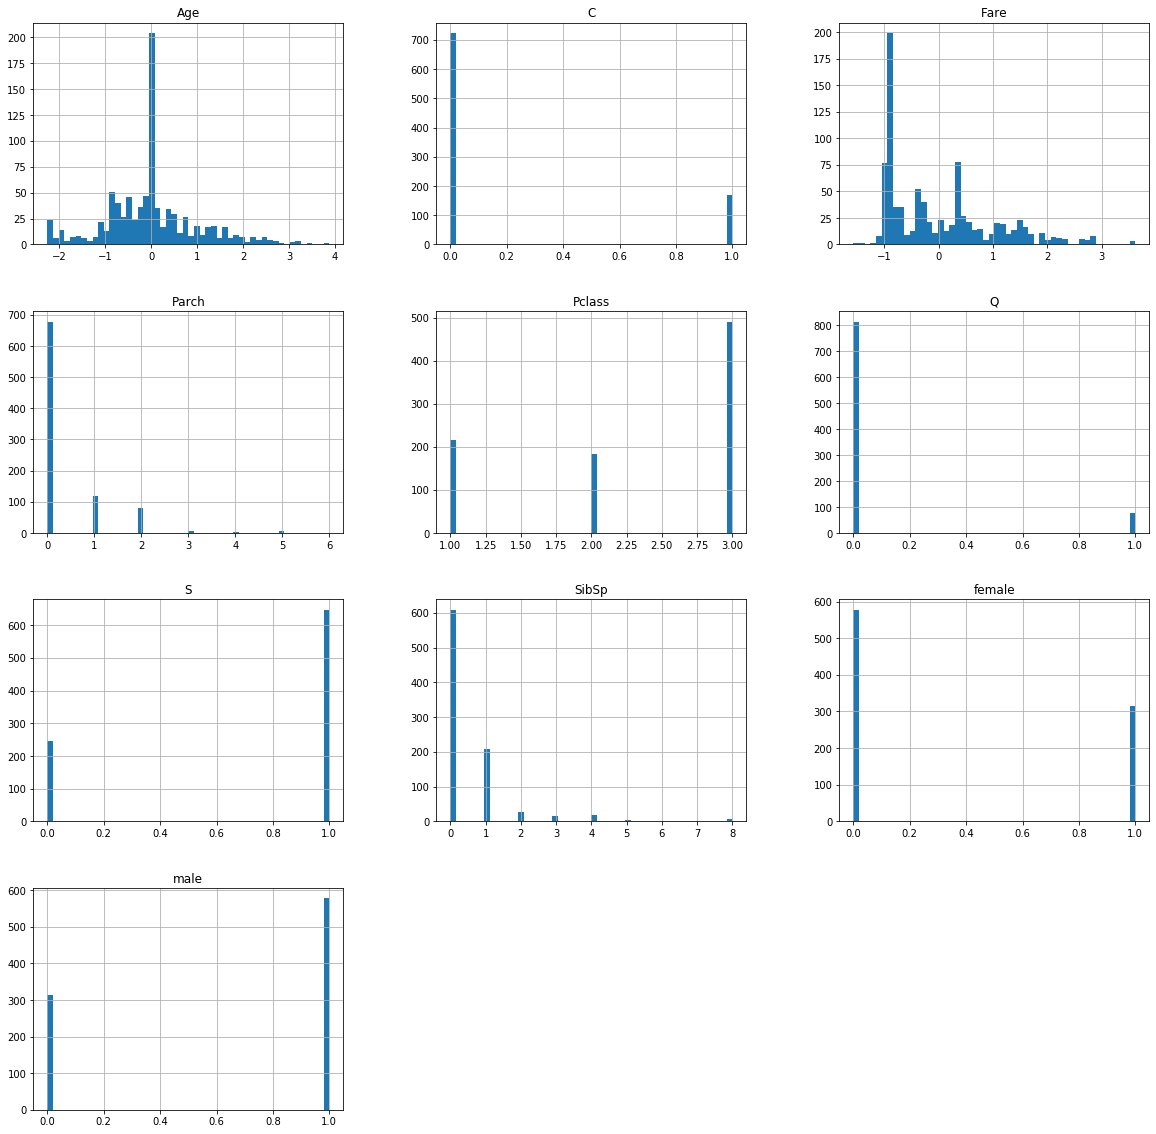

In [276]:
X_full.hist(bins=50, figsize=(20,20))

Valid scores:
[0.79329609 0.81460674 0.86516854 0.76966292 0.83146067]
0.0 - 0.3838383838383838
0.01 - 0.4882154882154882
0.02 - 0.5263748597081931
0.03 - 0.5634118967452301
0.04 - 0.5858585858585859
0.05 - 0.6004489337822672
0.06 - 0.6127946127946128
0.07 - 0.622895622895623
0.08 - 0.632996632996633
0.09 - 0.6397306397306397
0.1 - 0.6475869809203143
0.11 - 0.6610549943883277
0.12 - 0.6745230078563412
0.13 - 0.6879910213243546
0.14 - 0.6924803591470258
0.15 - 0.6958473625140292
0.16 - 0.7014590347923682
0.17 - 0.7059483726150393
0.18 - 0.712682379349046
0.19 - 0.7194163860830527
0.2 - 0.7227833894500562
0.21 - 0.7317620650953984
0.22 - 0.734006734006734
0.23 - 0.7373737373737373
0.24 - 0.7418630751964085
0.25 - 0.7474747474747475
0.26 - 0.7508417508417509
0.27 - 0.755331088664422
0.28 - 0.7598204264870931
0.29 - 0.7609427609427609
0.3 - 0.7609427609427609
0.31 - 0.7643097643097643
0.32 - 0.7631874298540965
0.33 - 0.7676767676767676
0.34 - 0.7676767676767676
0.35 - 0.7710437710437711
0.

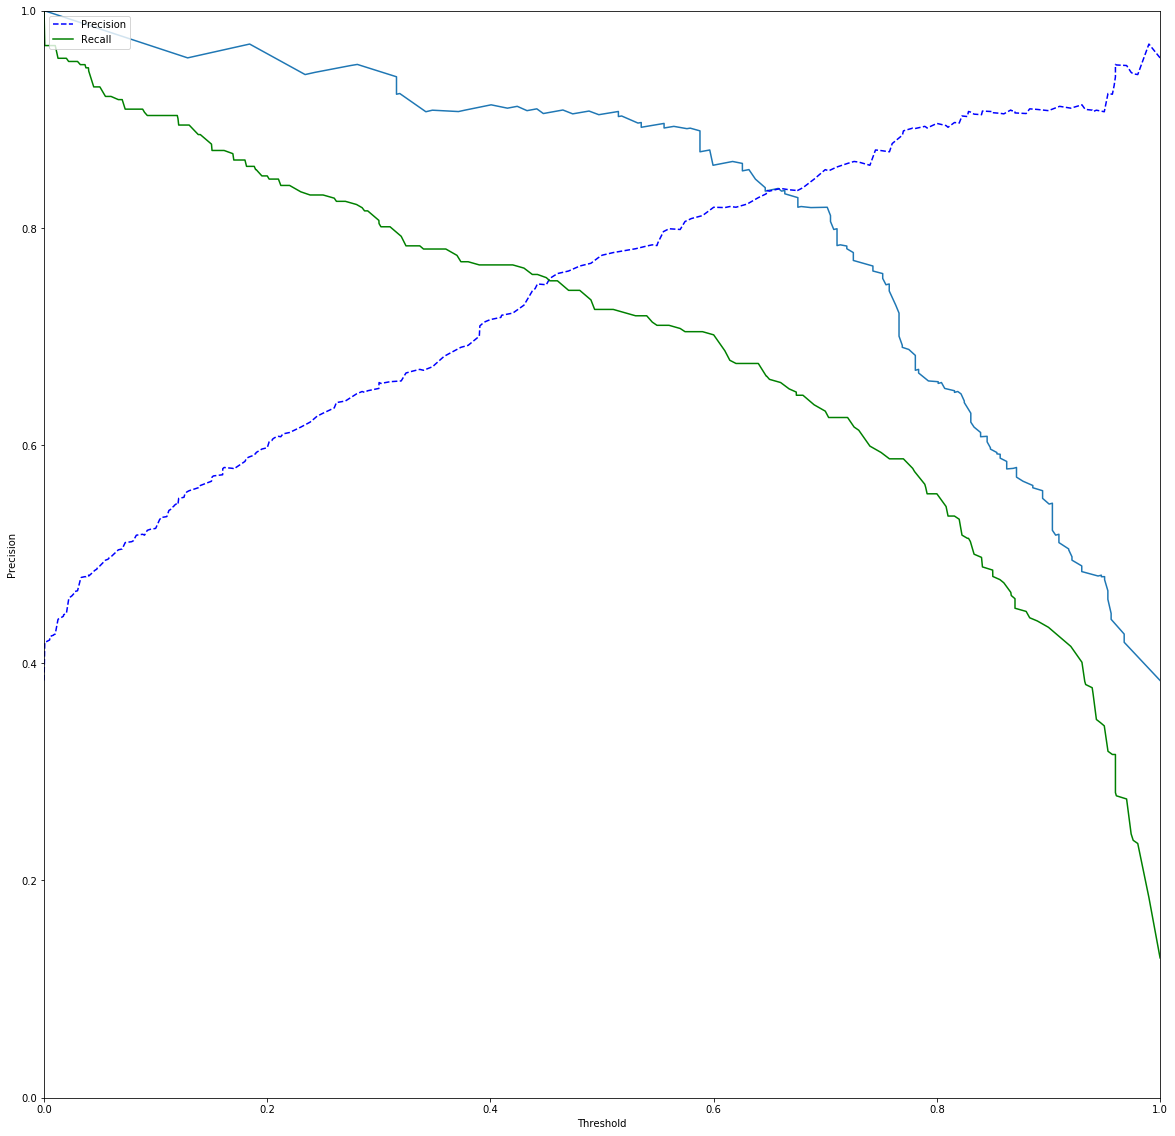

In [317]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

rf_clf = RandomForestClassifier(random_state=2020)
y_scores = cross_val_score(rf_clf, X_full, y, cv=5, scoring='accuracy')
y_preds = cross_val_predict(rf_clf, X_full, y, cv=5, method='predict_proba')


precisions, recalls, thresholds = precision_recall_curve(y, y_preds[:,1])
#print("Confusion Matrix:\n"+str(confusion_matrix(y, y_preds[:,1])))
print("Valid scores:\n"+str(y_scores))

def plot_pr_curve(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0,1])
    plt.xlim([0,1])
    
def plot_pr_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plt.figure(figsize=(20,20))   
plot_pr_curve(precisions, recalls)
plot_pr_threshold(precisions, recalls, thresholds)

def get_accuracy(y, y_proba, threshold):
    y_pred = (y_proba>=threshold)
    return sum(y_pred==y)/len(y)

for threshold in range(100):
    threshold = threshold/100.0
    print(str(threshold) + " - "+str(get_accuracy(list(y), y_preds[:,1], threshold)))


In [334]:
threshold=0.6

data_test = load_dataset(test_file)
final_model = RandomForestClassifier(random_state=2020)
data_prepared = full_pip.fit_transform(data_test)

def save_submission(y_preds, filename):
    res = pd.DataFrame({"PassengerId":data_test.index, "Survived":y_preds})
    res.to_csv(filename, index=False)
    
final_model.fit(X_full, y)
y_preds = final_model.predict_proba(data_prepared)[:,1]
y_preds = [1 if (y>=threshold) else 0 for y in y_preds]

save_submission(y_preds, "rf_threshold_0.6.csv")

y_preds

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
